---
# Part 3 of Practical Stats for Data Scientists, reworked for Python
---

This notebook assumes that the datasets referenced in Stats4DS.ipynb have been loaded.

The notebook picks up at Chapter 6 Logistics Regression

---
## Introduction

In [2]:
%matplotlib inline

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import sklearn.feature_selection
import sklearn.neighbors
#import statsmodels.api as sm
from scipy import stats

---
## K Means Example

### Load Data

In [29]:
loans_df = pd.read_csv('data/loan200.csv')

In [30]:
loans_df.head()

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81


In [31]:
loans_df['outcome'].unique()

array(['target', 'default', 'paid off'], dtype=object)

### Visualize Data

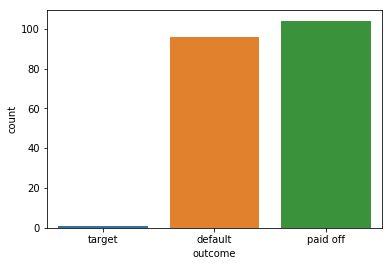

In [32]:
sns.countplot(x='outcome', data=loans_df)

In [33]:
loans2_df = loans_df.iloc[1:]

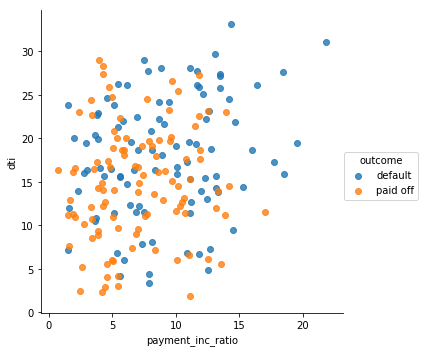

In [34]:
sns.lmplot(y='dti', x='payment_inc_ratio', hue='outcome', data=loans2_df, fit_reg=False)

In [40]:
loans3_df = loans2_df.copy()
loans3_df['code'] = 0
loans3_df['code'] = loans3_df['code'].where(loans3_df['outcome']=='paid off', 1)

In [41]:
loans3_df.head()

,outcome,payment_inc_ratio,dti,code
1,default,5.46933,21.33,1
2,paid off,6.90294,8.97,0
3,paid off,11.14800,1.83,0
4,default,3.72120,10.81,1
5,paid off,1.89923,11.34,0


In [47]:
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=20)

In [48]:
X = loans3_df[['dti', 'payment_inc_ratio']]
y = loans3_df['code']

neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [70]:
X_new = [[22.5, 9]]
print(neigh.predict(X_new))
print(neigh.predict_proba(X_new))

[0]
[[0.55 0.45]]


In [55]:
X.head()

,dti,payment_inc_ratio
1,21.33,5.46933
2,8.97,6.90294
3,1.83,11.14800
4,10.81,3.72120
5,11.34,1.89923


Text(0.5,1,'20 Nearest Neighbors to Test Point')

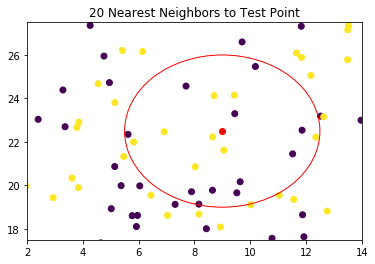

In [85]:
plt.scatter(y=X['dti'], x = X['payment_inc_ratio'], c=loans3_df['code'])
plt.scatter(y=22.5, x=9, color='r')
plt.xlim((2,14))
plt.ylim((17.5, 27.5))
circle=plt.Circle( (9,22.5), 3.5, color='r', fill=False)
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle)
ax.set_title('20 Nearest Neighbors to Test Point')

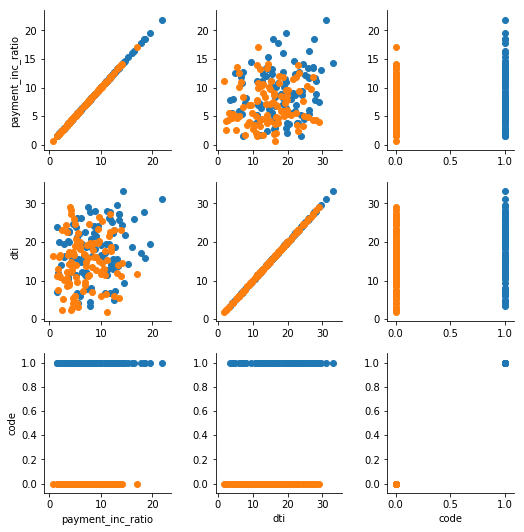

In [84]:
g = sns.PairGrid(loans3_df, hue='outcome')
g = g.map(plt.scatter)